<a href="https://colab.research.google.com/github/arthurt1/Projetos-de-Ci-ncias-de-Dados/blob/main/AP2_Arthur_Thom%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparando o Ambiente Colab

In [245]:
##Importando Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, display

In [246]:
##Criando Dataframe
dadosat = pd.read_csv('https://raw.githubusercontent.com/ccalmendra/ciencia-dados/refs/heads/main/dados/ap2-combustivel-producao.csv')



pd.set_option('display.max_rows', None)

# Tarefas 1 e 2



### 1. Identificar e imprimir todas as linhas com valores ausentes e as duplicadas.


*Atenção: cada Estado deve conter apenas uma linha para um determinado mês e
ano.*


#####Para as linhas com valores ausentes, sugira uma alteração (justifique a alteração no comentário do código) e aplique a alteração no dataframe. Caso não seja possível preencher o valor ausente, justifique.
---
### 2. Identificar e imprimir todas as linhas com valores inválidos.
Para as linhas com valores inválidos, sugira uma alteração (justifique a alteração no comentário do código) e aplique a alteração no dataframe

In [248]:
#Visualizar Dataframe
display(dadosat)

,Mês/Ano,Região,Estado,Produção Etanol Hidratado(m³/d),Produção Etanol Anidro (m³/d)
0,08/2023,CENTRO OESTE,Goiás,661956.0,167493.0
1,08/2023,CENTRO OESTE,Mato Grosso,346609.0,227672.0
2,08/2023,CENTRO OESTE,Mato Grosso do Sul,378912.0,119057.0
3,08/2023,NORDESTE,Alagoas,855.0,NaN
4,08/2023,NORDESTE,Bahia,32894.0,22560.0
5,08/23,NORDESTE,Maranhão,6067.0,28060.0
6,2023-08,NORDESTE,Paraíba,15038.0,28780.0
7,08/2023_,NORDESTE,Pernambuco,6230.0,353.0
8,08/2023,NORDESTE,Goiás,2945.0,7167.0
9,08/2023,NORDESTE,Goias,6011.0,5877.0


In [249]:
##Uma vez que ambas tarefas tem realizações correlacionadas, optei por realizar as duas simultaneamente de maneira a melhorar o resultado final

##Verfica-se os dados faltantes
dados_vazios = dadosat[dadosat.isnull().any(axis=1)]

##Verifica-se possíveis irregularidades nas datas
datas_invalidas = dadosat[pd.to_datetime(dadosat["Mês/Ano"], format= '%m/%Y', errors='coerce').isnull()]

##Como são poucas, é possível corrigir uma a uma e passar a coluna para datetime garantindo a ordenação correta
dadosat['Mês/Ano']= dadosat['Mês/Ano'].str.replace("08/23", "08/2023")
dadosat['Mês/Ano']= dadosat['Mês/Ano'].str.replace("08/2023_", "08/2023")
dadosat['Mês/Ano']= dadosat['Mês/Ano'].str.replace("2023-08", "08/2023")
dadosat['Mês/Ano']= pd.to_datetime(dadosat["Mês/Ano"], format= '%m/%Y',errors='coerce')
dadosat = dadosat.sort_values(by="Mês/Ano")



##Cria um dicionário com todos os estados e suas respectivas regiões
estado_para_regiao = {
    "Alagoas": "NORDESTE", "Bahia": "NORDESTE", "Ceará": "NORDESTE", "Maranhão": "NORDESTE",
    "Paraíba": "NORDESTE", "Pernambuco": "NORDESTE", "Piauí": "NORDESTE",
    "Rio Grande do Norte": "NORDESTE", "Sergipe": "NORDESTE",
    "Acre": "NORTE", "Amapá": "NORTE", "Amazonas": "NORTE", "Pará": "NORTE",
    "Rondônia": "NORTE", "Roraima": "NORTE", "Tocantins": "NORTE",
    "Goiás": "CENTRO OESTE", "Mato Grosso": "CENTRO OESTE", "Mato Grosso do Sul": "CENTRO OESTE",
    "Distrito Federal": "CENTRO OESTE",
    "Espírito Santo": "SUDESTE", "Minas Gerais": "SUDESTE", "Rio de Janeiro": "SUDESTE",
    "São Paulo": "SUDESTE",
    "Paraná": "SUL", "Rio Grande do Sul": "SUL", "Santa Catarina": "SUL"
}


##Transforma os valores do dicionário na variavel "estados_validos" e então verifica a coluna estado em busca de valores inválidos
estados_validos = estado_para_regiao.keys()
estados_invalidos = dadosat[~dadosat["Estado"].isin(estados_validos)]

##Assim como na situação anterior, é possível corrigir caso a caso dada a baixa ocorrência
dadosat['Estado'] = dadosat['Estado'].replace( {"Goias": "Goiás", "GO": "Goiás","Para":"Pará","Maranhao":"Maranhão"})


##Verifica o estado e coloca uma região equivalente ao estado, para garantir que todos os estados sejam considerados da região correta
correcao_regiao = lambda linha: estado_para_regiao[linha["Estado"]] if linha["Estado"] in estado_para_regiao and estado_para_regiao[linha["Estado"]] != linha["Região"] else linha["Região"]
regioes_invalidas = dadosat.loc[dadosat['Região'] != dadosat['Estado'].map(estado_para_regiao) ,:]
dadosat['Região'] = dadosat.apply(correcao_regiao,axis=1)



##Após datas, regiões e estados estarem corrigidos, agora é possível vizualizar com exatidão os valores vazios restantes e os duplicados
#Os valores vazios na coluna 'Região' já foram corrigidos com a função lambda correcao_regiao por este motivo dados_vazios é definido antes desta correção

#Filtrando dados duplicados
dados_duplicados = dadosat[dadosat.duplicated(subset=['Mês/Ano', 'Estado'])]
##Tratando dados duplicados pela média dos duplicados
dadosat = dadosat.groupby(['Mês/Ano', 'Estado'], as_index=False).agg({
    'Produção Etanol Hidratado(m³/d)': 'mean',
    'Produção Etanol Anidro (m³/d)': 'mean',})

#Define a média de produção de etanol hidratado e anidro para cada estado
media_etanolH_estado = dadosat.groupby('Estado')['Produção Etanol Hidratado(m³/d)'].mean()
media_etanolA_estado = dadosat.groupby('Estado')['Produção Etanol Anidro (m³/d)'].mean()

#Imprime as médias de cada estado
display(media_etanolH_estado)
display(media_etanolA_estado)

##Farei uma interpolação temporal da 'Produção Etanol Hidratado(m³/d) a fim de manter o padrão anual
dadosat = dadosat.set_index('Mês/Ano')
dadosat['Produção Etanol Hidratado(m³/d)'] = dadosat['Produção Etanol Hidratado(m³/d)'].interpolate(method='time')

#A 'Produção Etanol Anidro (m³/d)' em Amazonas, Rio Grande do Sul, Rio de Janeiro e Rondônia não tem nenhum valor,
#portanto, assumirei que estes estados não produzem esse tipo de Etanol e os preencherei com 0.0

estados_sem_producao_anidro = ['Amazonas', 'Rio Grande do Sul', 'Rio de Janeiro', 'Rondônia']
dadosat.loc[dadosat['Estado'].isin(estados_sem_producao_anidro), 'Produção Etanol Anidro (m³/d)'] = 0.0

#Para o restante, também farei uma interpolação temporal a fim de manter o padrão anual
dadosat['Produção Etanol Anidro (m³/d)'] = dadosat['Produção Etanol Anidro (m³/d)'].interpolate(method='time')





,Produção Etanol Hidratado(m³/d)
Estado,
Alagoas,25585.116279
Amazonas,1368.454545
Bahia,19308.750000
Espírito Santo,3720.953488
Goiás,341249.454545
Maranhão,2078.891892
Mato Grosso,201535.963636
Mato Grosso do Sul,190954.480769
Minas Gerais,171564.080000


,Produção Etanol Anidro (m³/d)
Estado,
Alagoas,22364.400000
Amazonas,NaN
Bahia,13325.219512
Espírito Santo,9368.558140
Goiás,91460.203704
Maranhão,16796.675000
Mato Grosso,102716.642857
Mato Grosso do Sul,74976.833333
Minas Gerais,339030.911111


In [250]:
##Imprimir as linhas inválidas
display(HTML("<h2 style='color: white; text-align: left;'>  Linhas com Valores Ausentes  </h2>"))
display(dados_vazios)
print('\n')
display(HTML("<h2 style='color: white; text-align: left;'>  Linhas com Datas Inválidas  </h2>"))
display(datas_invalidas)
print('\n')
display(HTML("<h2 style='color: white; text-align: left;'>  Linhas com Estados Inválidos  </h2>"))
display(estados_invalidos)
print('\n')
display(HTML("<h2 style='color: white; text-align: left;'> Linhas com Regiões Inválidas  </h2>"))
display(regioes_invalidas)
print('\n')
display(HTML("<h2 style='color: white; text-align: left;'>  Linhas Duplicadas  </h2>"))
display(dados_duplicados)


,Mês/Ano,Região,Estado,Produção Etanol Hidratado(m³/d),Produção Etanol Anidro (m³/d)
3,08/2023,NORDESTE,Alagoas,855.0,NaN
10,08/2023,NORTE,GO,1004.0,NaN
15,08/2023,NaN,Rio de Janeiro,NaN,NaN
18,08/2023,SUL,Rio Grande do Sul,2.0,NaN
27,07/2023,NaN,Tocantins,NaN,18646.0
30,07/2023,SUDESTE,Rio de Janeiro,19991.0,NaN
33,07/2023,SUL,Rio Grande do Sul,3.0,NaN
44,06/2023,SUDESTE,Rio de Janeiro,14257.0,NaN
47,06/2023,SUL,Rio Grande do Sul,0.0,NaN
50,05/2023,NaN,Mato Grosso do Sul,NaN,166670.0


,Mês/Ano,Região,Estado,Produção Etanol Hidratado(m³/d),Produção Etanol Anidro (m³/d)
5,08/23,NORDESTE,Maranhão,6067.0,28060.0
6,2023-08,NORDESTE,Paraíba,15038.0,28780.0
7,08/2023_,NORDESTE,Pernambuco,6230.0,353.0
853,08/23,NORDESTE,Maranhão,6067.0,28060.0


,Mês/Ano,Região,Estado,Produção Etanol Hidratado(m³/d),Produção Etanol Anidro (m³/d)
794,2019-05-01,NORDESTE,Maranhao,8.0,8216.0
782,2019-06-01,NORTE,Para,1804.0,4356.0
9,2023-08-01,NORDESTE,Goias,6011.0,5877.0
10,2023-08-01,NORTE,GO,1004.0,NaN


,Mês/Ano,Região,Estado,Produção Etanol Hidratado(m³/d),Produção Etanol Anidro (m³/d)
818,2019-03-01,NaN,Mato Grosso do Sul,NaN,15696.0
820,2019-03-01,NaN,Paraíba,NaN,9010.0
596,2020-06-01,NaN,Minas Gerais,NaN,133321.0
582,2020-07-01,NaN,Minas Gerais,NaN,133675.0
477,2020-12-01,NaN,Goiás,NaN,6715.0
331,2021-11-01,NaN,Espírito Santo,NaN,5453.0
152,2022-10-01,NaN,Mato Grosso,NaN,174639.0
50,2023-05-01,NaN,Mato Grosso do Sul,NaN,166670.0
27,2023-07-01,NaN,Tocantins,NaN,18646.0
9,2023-08-01,NORDESTE,Goiás,6011.0,5877.0


,Mês/Ano,Região,Estado,Produção Etanol Hidratado(m³/d),Produção Etanol Anidro (m³/d)
841,2019-01-01,NORDESTE,Paraíba,15903.0,13118.0
850,2019-02-01,CENTRO OESTE,Goiás,22957.0,5848.0
852,2020-08-01,SUDESTE,Rio de Janeiro,30784.0,NaN
380,2021-08-01,NORDESTE,Paraíba,14864.0,20227.0
854,2023-05-01,NORDESTE,Bahia,24664.0,15492.0
5,2023-08-01,NORDESTE,Maranhão,6067.0,28060.0
10,2023-08-01,CENTRO OESTE,Goiás,1004.0,NaN
8,2023-08-01,CENTRO OESTE,Goiás,2945.0,7167.0
0,2023-08-01,CENTRO OESTE,Goiás,661956.0,167493.0


# Tarefa 3

Identificar e imprimir outliers para cada uma das colunas de volume (m3) produzido. Justifique sua escolha de cálculo de outlier.

In [251]:
# Função para calcular o IQR e identificar os outliers
def calcular_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    outliers = df[(df[coluna] < lim_inf) | (df[coluna] > lim_sup)]
    return outliers

# Agrupar por estado e calcular os outliers para cada estado
outliers_hidratado_por_estado = dadosat.groupby('Estado').apply(lambda x: calcular_outliers(x, 'Produção Etanol Hidratado(m³/d)'))
outliers_anidro_por_estado = dadosat.groupby('Estado').apply(lambda x: calcular_outliers(x, 'Produção Etanol Anidro (m³/d)'))

display(HTML("<h2 style='color: white; text-align: left;'>  Outliers de Produção Etanol Hidratado por Estado  </h2>"))
display(outliers_hidratado_por_estado)
print('\n')
display(HTML("<h2 style='color: white; text-align: left;'>  Outliers de Produção Etanol Anidro por Estado  </h2>"))
display(outliers_anidro_por_estado)


<ipython-input-251-765bf581779c>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers_hidratado_por_estado = dadosat.groupby('Estado').apply(lambda x: calcular_outliers(x, 'Produção Etanol Hidratado(m³/d)'))
<ipython-input-251-765bf581779c>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers_anidro_por_estado = dadosat.groupby('Estado').apply(lambda x: calcular_outliers(x, 'Produção Etanol Anid

Estado  \
Estado            Mês/Ano                         
Espírito Santo    2019-01-01     Espírito Santo   
                  2021-11-01     Espírito Santo   
Maranhão          2019-08-01           Maranhão   
                  2020-04-01           Maranhão   
                  2023-04-01           Maranhão   
                  2023-08-01           Maranhão   
Pará              2019-05-01               Pará   
                  2019-10-01               Pará   
                  2020-10-01               Pará   
                  2021-09-01               Pará   
                  2022-04-01               Pará   
Piauí             2019-08-01              Piauí   
                  2019-09-01              Piauí   
Rio Grande do Sul 2019-08-01  Rio Grande do Sul   
                  2019-09-01  Rio Grande do Sul   
                  2019-10-01  Rio Grande do Sul   
Tocantins         2021-08-01          Tocantins   
                  2023-07-01          Tocantins   

                              Produção Etanol Hidratado(m³/d)  \
Estado            Mês/Ano                                       
Espírito Santo    2019-01-01                         101131.0   
                  2021-11-01                          64005.0   
Maranhão          2019-08-01                           8738.0   
                  2020-04-01                         165249.0   
                  2023-04-01                         175146.0   
                  2023-08-01                           6067.0   
Pará              2019-05-01                             44.0   
                  2019-10-01                           4468.0   
                  2020-10-01                           3561.0   
                  2021-09-01                           3332.0   
                  2022-04-01                         132726.0   
Piauí             2019-08-01                           7680.0   
                  2019-09-01                           7096.0   
Rio Grande do Sul 2019-08-01                            675.0   
                  2019-09-01                            548.0   
                  2019-10-01                            243.0   
Tocantins         2021-08-01                          25446.0   
                  2023-07-01                         308189.0   

                              Produção Etanol Anidro (m³/d)  
Estado            Mês/Ano                                    
Espírito Santo    2019-01-01                         7962.0  
                  2021-11-01                         5453.0  
Maranhão          2019-08-01                        27570.0  
                  2020-04-01                          732.0  
                  2023-04-01                          353.0  
                  2023-08-01                        28060.0  
Pará              2019-05-01                         4736.0  
                  2019-10-01                         5216.0  
                  2020-10-01                         6987.0  
                  2021-09-01                         5484.0  
                  2022-04-01                           60.0  
Piauí             2019-08-01                          807.0  
                  2019-09-01                         1797.0  
Rio Grande do Sul 2019-08-01                            0.0  
                  2019-09-01                            0.0  
                  2019-10-01                            0.0  
Tocantins         2021-08-01                         6538.0  
                  2023-07-01                        18646.0

Estado  \
Estado              Mês/Ano                           
Espírito Santo      2020-04-01       Espírito Santo   
Minas Gerais        2019-07-01         Minas Gerais   
Pará                2022-01-01                 Pará   
                    2022-03-01                 Pará   
                    2022-04-01                 Pará   
                    2022-05-01                 Pará   
                    2023-05-01                 Pará   
Pernambuco          2022-05-01           Pernambuco   
Piauí               2019-06-01                Piauí   
                    2022-06-01                Piauí   
                    2022-12-01                Piauí   
Rio Grande do Norte 2019-08-01  Rio Grande do Norte   
                    2021-02-01  Rio Grande do Norte   
Sergipe             2019-09-01              Sergipe   
                    2020-09-01              Sergipe   
                    2021-09-01              Sergipe   
                    2022-03-01              Sergipe   
                    2023-05-01              Sergipe   
Tocantins           2019-04-01            Tocantins   
                    2020-04-01            Tocantins   
                    2022-04-01            Tocantins   

                                Produção Etanol Hidratado(m³/d)  \
Estado              Mês/Ano                                       
Espírito Santo      2020-04-01                            597.0   
Minas Gerais        2019-07-01                         384120.0   
Pará                2022-01-01                           1310.0   
                    2022-03-01                            984.0   
                    2022-04-01                         132726.0   
                    2022-05-01                           1568.0   
                    2023-05-01                            705.0   
Pernambuco          2022-05-01                             88.0   
Piauí               2019-06-01                           1471.0   
                    2022-06-01                           1910.0   
                    2022-12-01                           2520.0   
Rio Grande do Norte 2019-08-01                           4132.0   
                    2021-02-01                           2874.0   
Sergipe             2019-09-01                           3493.0   
                    2020-09-01                           2226.0   
                    2021-09-01                           1710.0   
                    2022-03-01                           1542.0   
                    2023-05-01                            452.0   
Tocantins           2019-04-01                           9185.0   
                    2020-04-01                          12826.0   
                    2022-04-01                          18001.0   

                                Produção Etanol Anidro (m³/d)  
Estado              Mês/Ano                                    
Espírito Santo      2020-04-01                        45972.0  
Minas Gerais        2019-07-01                     10190212.0  
Pará                2022-01-01                          158.0  
                    2022-03-01                        11790.0  
                    2022-04-01                           60.0  
                    2022-05-01                          711.0  
                    2023-05-01                          143.0  
Pernambuco          2022-05-01                       106652.0  
Piauí               2019-06-01                        87284.0  
                    2022-06-01                       180970.0  
                    2022-12-01                        38452.0  
Rio Grande do Norte 2019-08-01                       176701.0  
                    2021-02-01                        36048.0  
Sergipe             2019-09-01                        80512.0  
                    2020-09-01                        11664.0  
                    2021-09-01                       187123.0  
                    2022-03-01                        11790.0  
                    2

# Tarefa 4

Elabore uma visualização para mostrar quais são os estados com maior produção dos dois tipos de combustível em cada ano.

<ipython-input-259-0f5f943b5121>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=prod_por_estado_ano, x='Ano', y='Produção Etanol Hidratado(m³/d)', hue='Estado', ci=None)


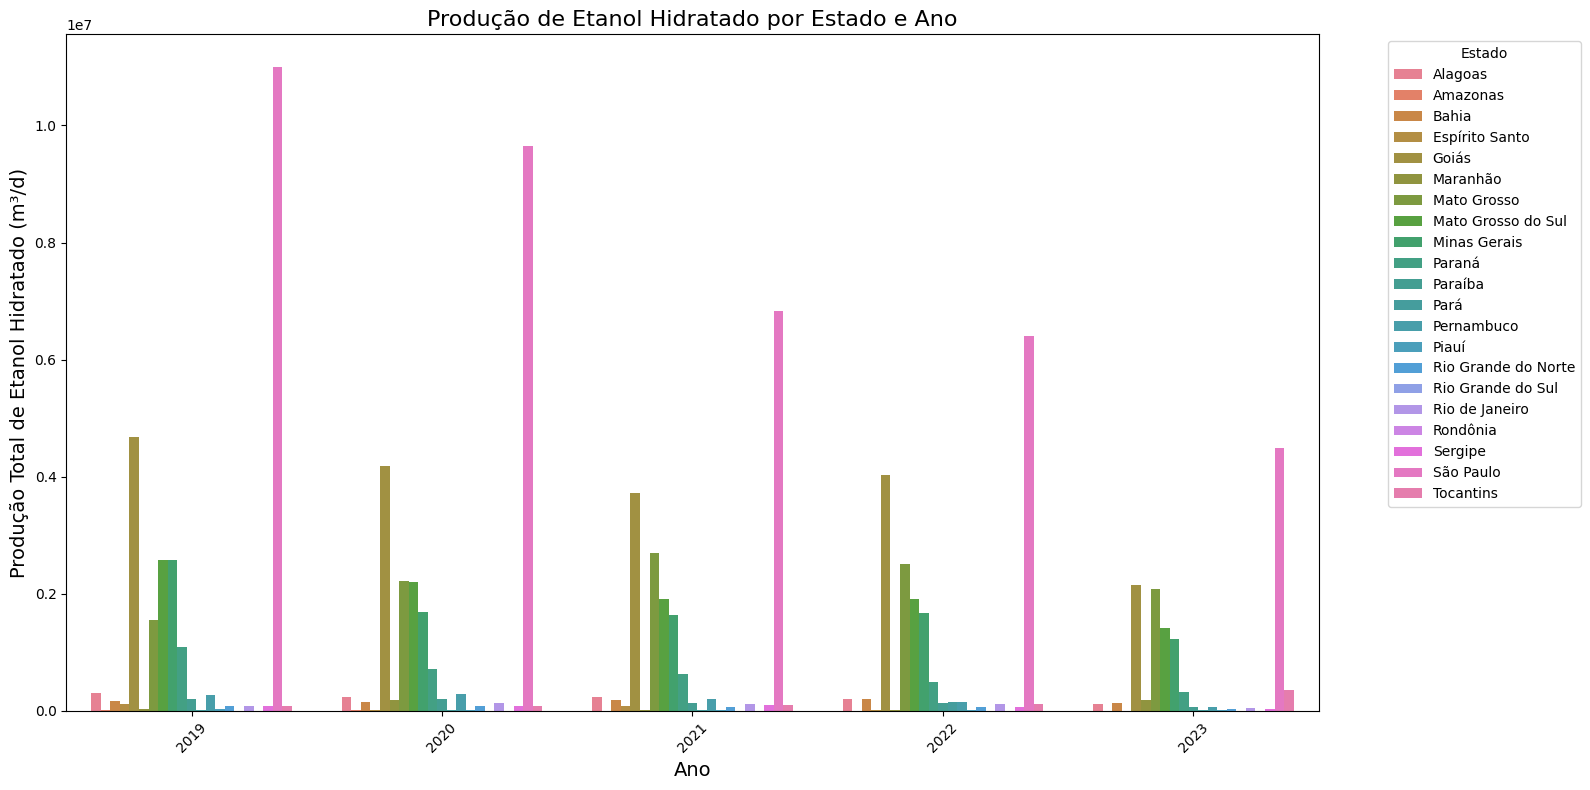

<ipython-input-259-0f5f943b5121>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=prod_por_estado_ano, x='Ano', y='Produção Etanol Anidro (m³/d)', hue='Estado', ci=None)


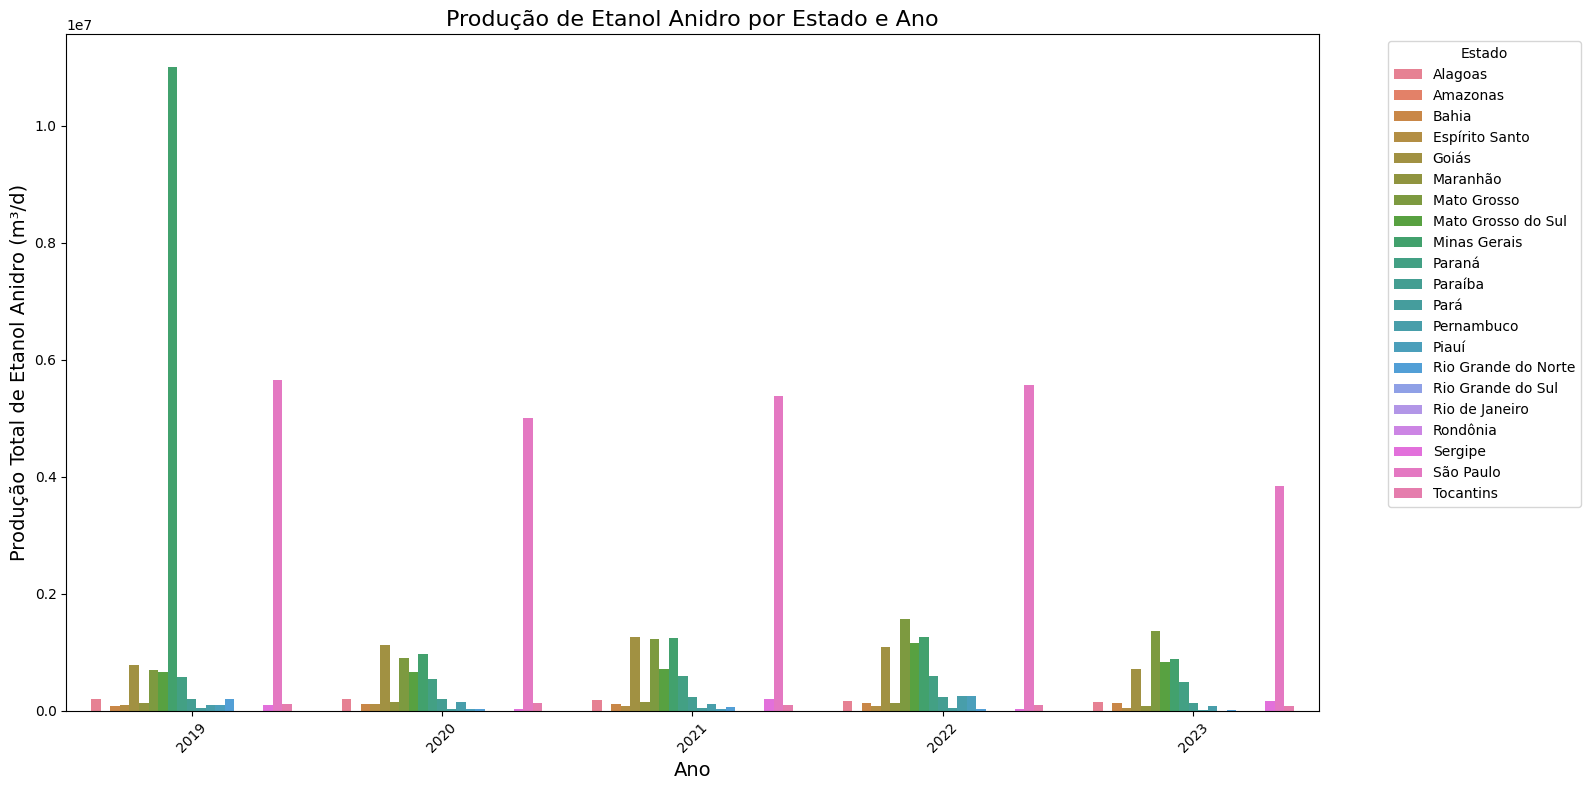

In [259]:
# Adiciona uma coluna de ano extra para facilitar o agrupamento
dadosat['Ano'] = dadosat.index.year

# Agrupa os dados por estado e ano e soma a produção dos dois tipos de etanol
prod_por_estado_ano = dadosat.groupby(['Estado', 'Ano'])[['Produção Etanol Hidratado(m³/d)', 'Produção Etanol Anidro (m³/d)']].sum().reset_index()

# Plotando a produção de etanol hidratado
plt.figure(figsize=(16, 8))
sns.barplot(data=prod_por_estado_ano, x='Ano', y='Produção Etanol Hidratado(m³/d)', hue='Estado', ci=None)

plt.title('Produção de Etanol Hidratado por Estado e Ano', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Produção Total de Etanol Hidratado (m³/d)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Plotando a produção de etanol anidro
plt.figure(figsize=(16, 8))
sns.barplot(data=prod_por_estado_ano, x='Ano', y='Produção Etanol Anidro (m³/d)', hue='Estado', ci=None)

plt.title('Produção de Etanol Anidro por Estado e Ano', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Produção Total de Etanol Anidro (m³/d)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Tarefa 5

Elabore uma visualização para mostrar a evolução ao longo dos anos do volume de produção por região, diferenciando cada tipo de combustível.

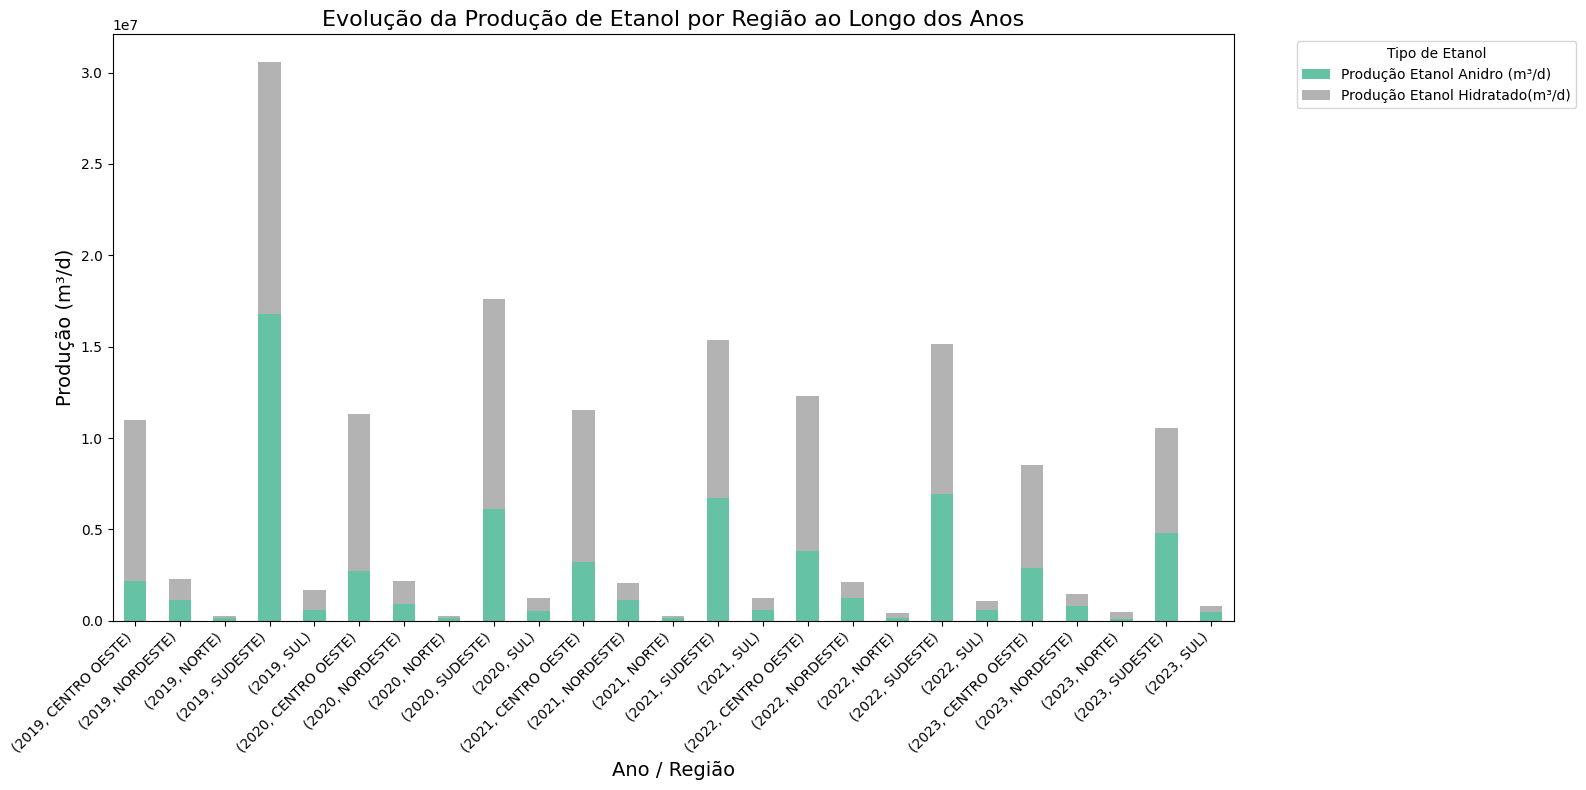

In [262]:
if 'Região' not in dadosat.columns:
    dadosat['Região'] = dadosat['Estado'].map(estado_para_regiao)

# Agrupa os dados por região, ano e tipo de combustível
prod_por_regiao_ano = dadosat.groupby(['Região', 'Ano'])[['Produção Etanol Hidratado(m³/d)', 'Produção Etanol Anidro (m³/d)']].sum().reset_index()

# Muda o formato para um formato longo (long-form) para facilitar a plotagem com seaborn
prod_por_regiao_ano = pd.melt(prod_por_regiao_ano, id_vars=['Região', 'Ano'], value_vars=['Produção Etanol Hidratado(m³/d)', 'Produção Etanol Anidro (m³/d)'],
                               var_name='Tipo de Etanol', value_name='Produção (m³/d)')

# Cria um pivot table para separar os tipos de etanol nas colunas
prod_pivot = prod_por_regiao_ano.pivot_table(index=['Ano', 'Região'], columns='Tipo de Etanol', values='Produção (m³/d)', aggfunc='sum')

# Plota o histograma empilhado
prod_pivot.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='Set2')

# Ajustes do gráfico
plt.title('Evolução da Produção de Etanol por Região ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano / Região', fontsize=14)
plt.ylabel('Produção (m³/d)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Etanol', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Tarefa 6


Elabore uma visualização para mostrar mês a mês o volume de produção nacional, diferenciando cada tipo de combustível.

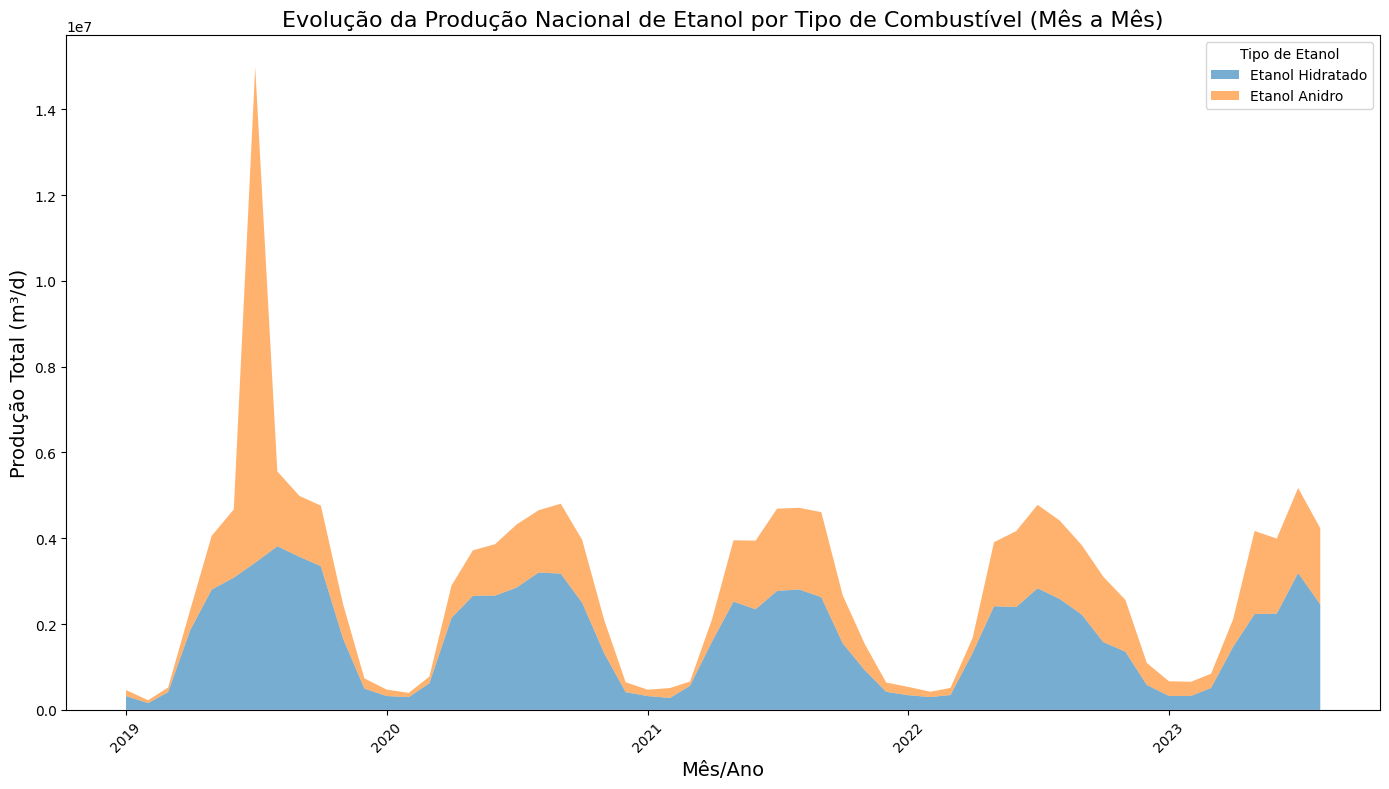

In [265]:
# Agrupar os dados por mês e somar a produção de etanol
prod_nacional_mensal = dadosat.groupby(['Mês/Ano'])[['Produção Etanol Hidratado(m³/d)', 'Produção Etanol Anidro (m³/d)']].sum().reset_index()

# Criando o gráfico de área empilhada
plt.figure(figsize=(14, 8))
plt.stackplot(prod_nacional_mensal['Mês/Ano'],
              prod_nacional_mensal['Produção Etanol Hidratado(m³/d)'],
              prod_nacional_mensal['Produção Etanol Anidro (m³/d)'],
              labels=['Etanol Hidratado', 'Etanol Anidro'],
              alpha=0.6)

# Personalizando o gráfico
plt.title('Evolução da Produção Nacional de Etanol por Tipo de Combustível (Mês a Mês)', fontsize=16)
plt.xlabel('Mês/Ano', fontsize=14)
plt.ylabel('Produção Total (m³/d)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Tipo de Etanol')

# Exibindo o gráfico
plt.tight_layout()
plt.show()
